## Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df2 = pd.read_csv('Data_grouped_by_date.csv', parse_dates=['date'], infer_datetime_format=True)
df2 = df2.set_index(['date'])

## Decomposition
- Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
- Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.
- A stationary time series is one whose properties do not depend on the time at which the series is observed. From decomposition it can be seen that our target variables % Iron Concentrate & % Silica Concentrate are stationary.

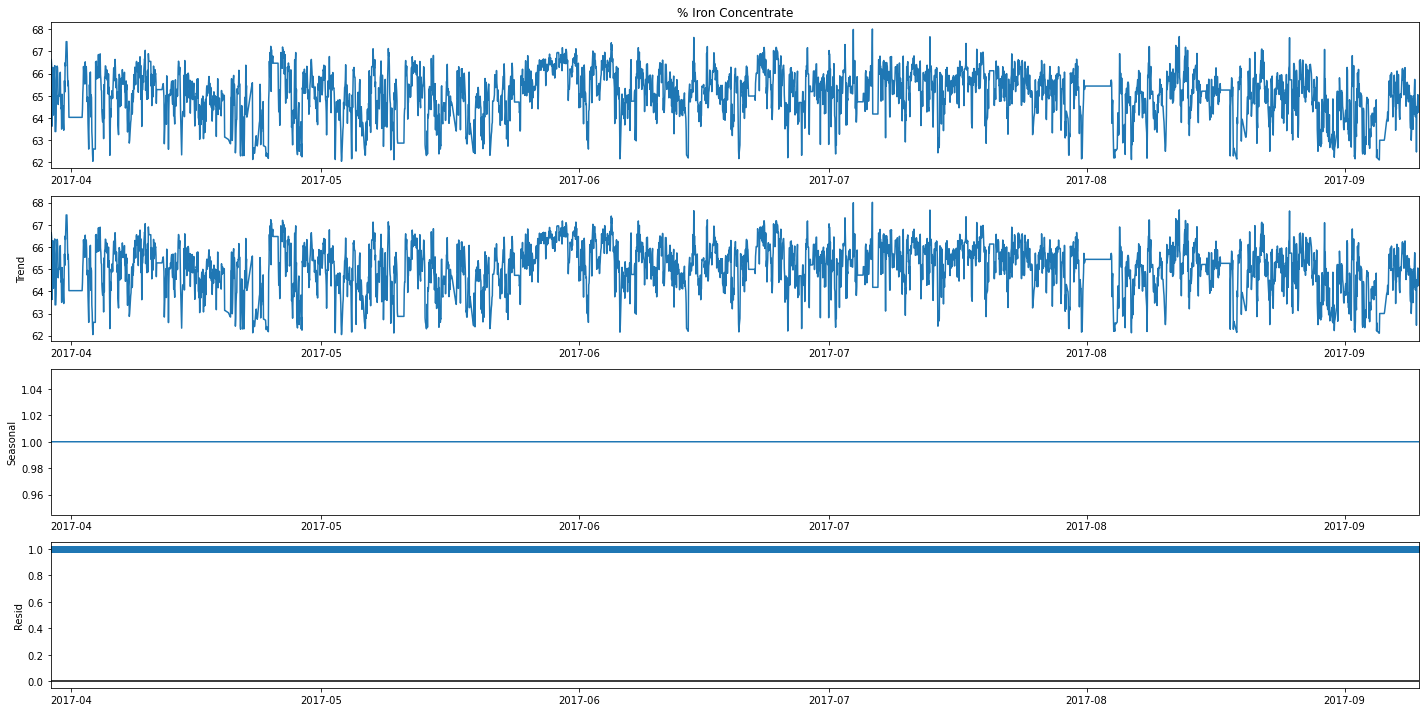

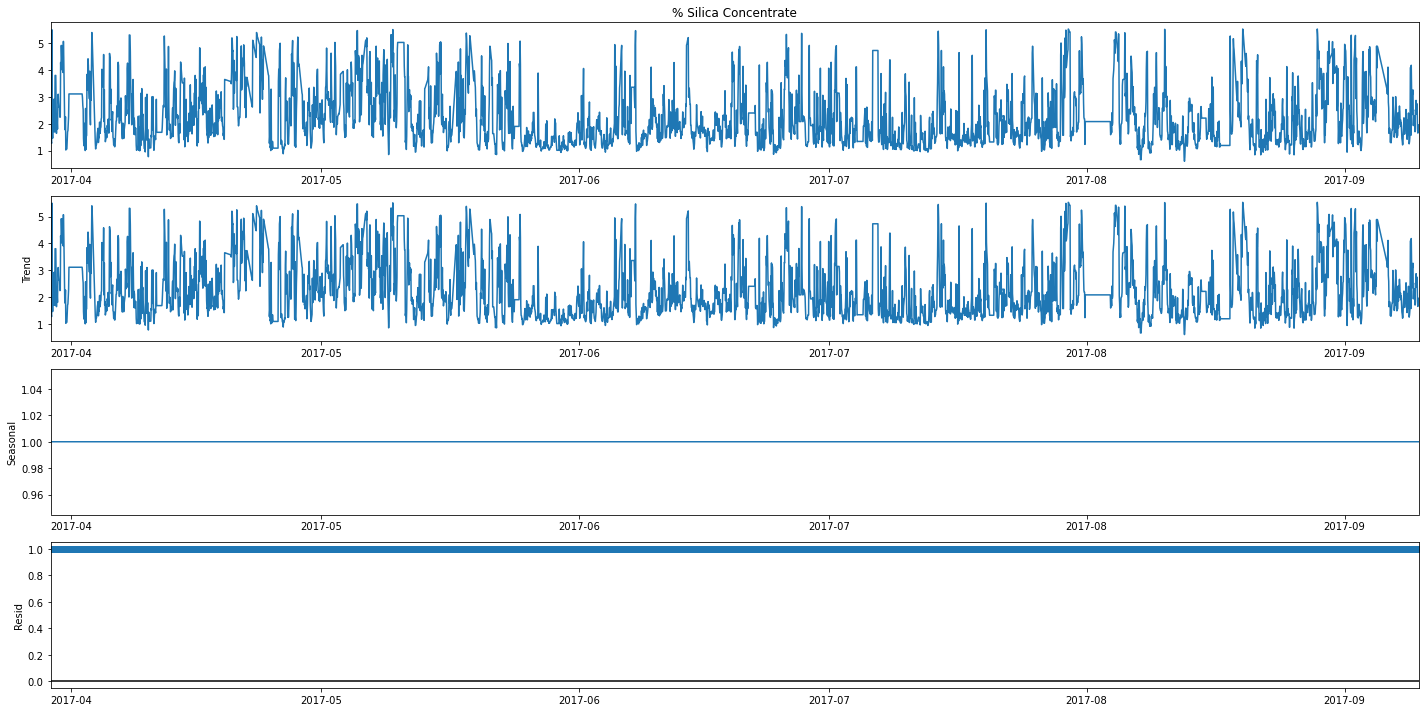

In [ ]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
pyplot.rcParams["figure.figsize"] = (20,10)

result = seasonal_decompose(df2['% Iron Concentrate'], model='multiplicative', period=1)
result.plot()
pyplot.show()

result = seasonal_decompose(df2['% Silica Concentrate'], model='multiplicative', period=1)
result.plot()
pyplot.show()

## Moving Average (MA)

- Moving average value can be used directly to make predictions.
- This is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for.
- As new observations are made ever hour, the model can be updated and a prediction made for the next hour(s).

In [ ]:
from numpy import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#create lists to store model results
rolling_window_size = []
MAE_list = []
R2_list = []
MSE_list = []

# test different rolling window values
for value in range(1,10):
    # create history variable which will record past entries and test variable which holds the correct values
    X = df2['% Iron Concentrate']
    window = value
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()

    # create predictions using past history and time steps
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        
    #collect the model scores for test dataset
    rolling_window_size.append(value)
    MAE_list.append(mean_absolute_error(test,predictions))
    R2_list.append(r2_score(test,predictions))
    MSE_list.append(mean_squared_error(test,predictions))

#display results  
print('% Iron Concentrate Results')
MA_iron = pd.DataFrame({
        'Rolling Window Size':rolling_window_size,
        'R2':R2_list,
        'MAE':MAE_list,
        'MSE':MSE_list
}).set_index(['Rolling Window Size'])

display(MA_iron)

#now redo for silica

#create lists to store model results
rolling_window_size = []
MAE_list = []
R2_list = []
MSE_list = []

# test different rolling window values
for value in range(1,10):
    # create history variable which will record past entries and test variable which holds the correct values
    X = df2['% Silica Concentrate']
    window = value
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()

    # create predictions using past history and time steps
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        
    #collect the model scores for test dataset
    rolling_window_size.append(value)
    MAE_list.append(mean_absolute_error(test,predictions))
    R2_list.append(r2_score(test,predictions))
    MSE_list.append(mean_squared_error(test,predictions))

#display results  
print('% Silica Concentrate Results')
MA_silica = pd.DataFrame({
        'Rolling Window Size':rolling_window_size,
        'R2':R2_list,
        'MAE':MAE_list,
        'MSE':MSE_list
}).set_index(['Rolling Window Size'])

display(MA_silica)

% Iron Concentrate Results


,R2,MAE,MSE
Rolling Window Size,,,
1,0.499597,0.540028,0.615591
2,0.527995,0.536884,0.580518
3,0.499116,0.558779,0.615862
4,0.456963,0.586662,0.667597
5,0.417028,0.614863,0.716585
6,0.380174,0.636899,0.761866
7,0.348325,0.656953,0.800965
8,0.318517,0.676403,0.837541
9,0.294223,0.691941,0.867476


% Silica Concentrate Results


,R2,MAE,MSE
Rolling Window Size,,,
1,0.559575,0.456278,0.552482
2,0.566908,0.477800,0.543333
3,0.539079,0.504602,0.578277
4,0.497046,0.536787,0.631030
5,0.456786,0.567416,0.680325
6,0.419358,0.594253,0.727316
7,0.384775,0.618818,0.770714
8,0.354224,0.639910,0.809126
9,0.328324,0.657979,0.841746


## ARIMA (Autoregressive Integrated Moving Average Model)

In [ ]:
df2 = pd.read_csv('Data_grouped_by_date.csv', parse_dates=['date'], infer_datetime_format=True)
df2 = df2.set_index(['date'])

<ipython-input-10-89fffaade04c>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


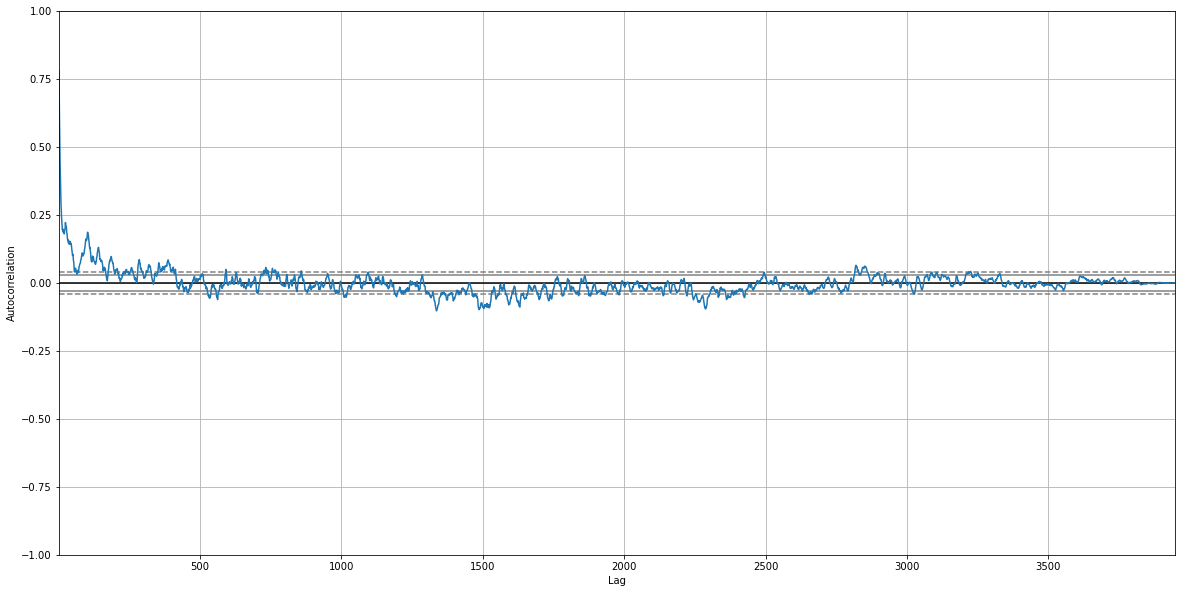

In [ ]:
#create an autocorrelation plot of the time series

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = df2['% Silica Concentrate']
autocorrelation_plot(series)
pyplot.show()

<ipython-input-11-ef97148c9783>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/Users/Prashanta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/Prashanta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/Prashanta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/Prashanta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statesp

                                SARIMAX Results                                 
Dep. Variable:     % Silica Concentrate   No. Observations:                 3948
Model:                   ARIMA(5, 0, 2)   Log Likelihood               -4127.102
Date:                  Tue, 31 Aug 2021   AIC                           8272.204
Time:                          16:24:23   BIC                           8328.732
Sample:                      03-29-2017   HQIC                          8292.255
                           - 09-09-2017                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2859      0.081     28.211      0.000       2.127       2.445
ar.L1         -0.3160      0.184     -1.720      0.085      -0.676       0.044
ar.L2         -0.0045      0.163    

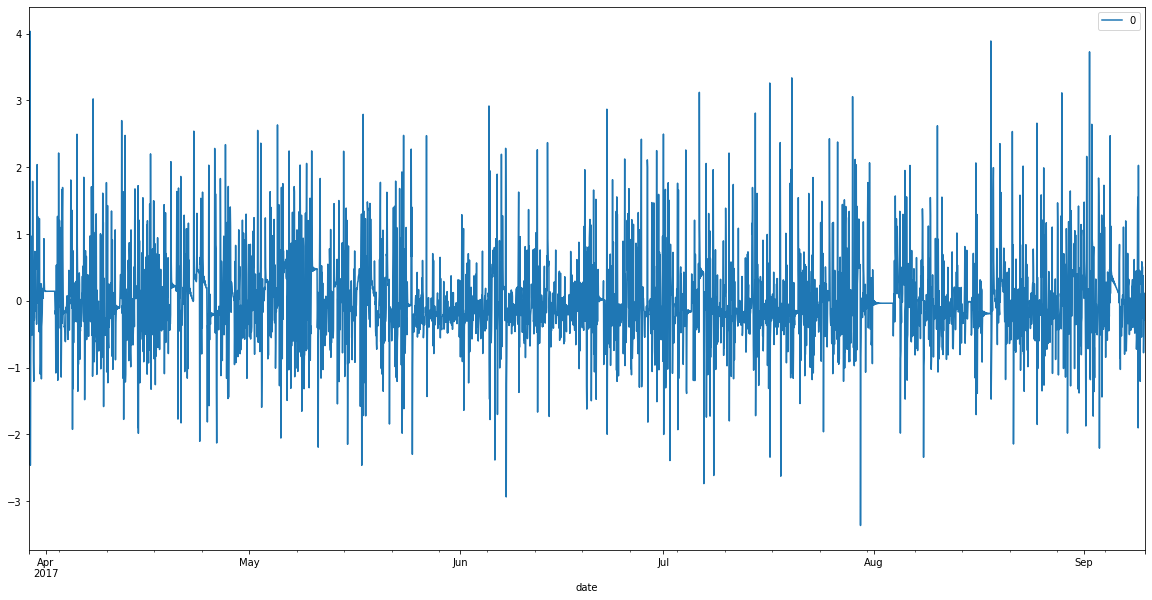

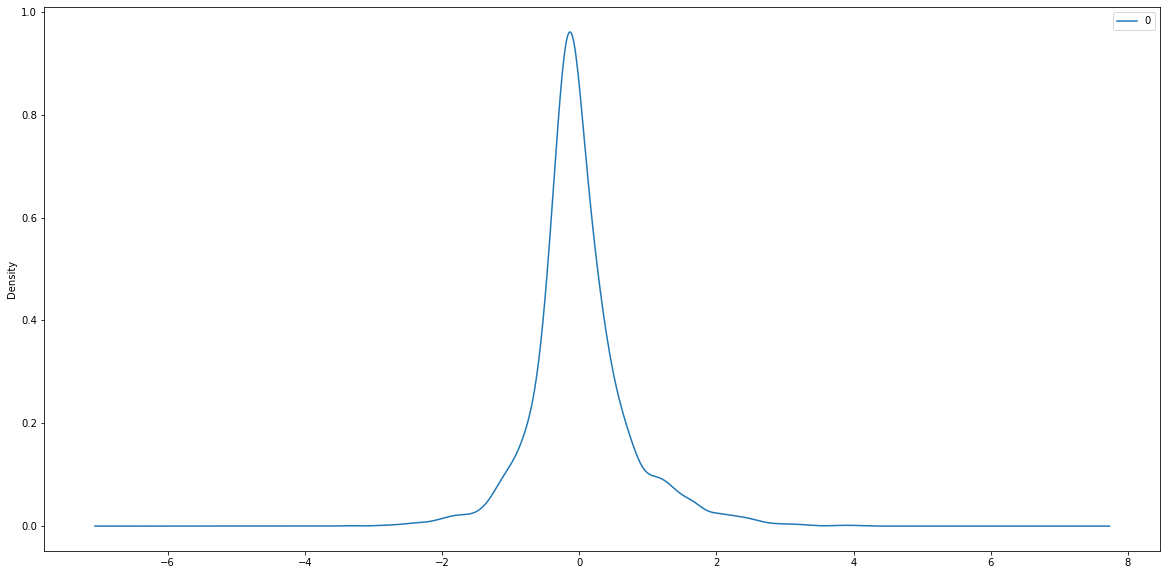

                 0
count  3948.000000
mean      0.006217
std       0.688344
min      -3.362642
25%      -0.326223
50%      -0.071326
75%       0.267381
max       4.033588


In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# load dataset
series = df2['% Silica Concentrate']

# fit model
model = ARIMA(series, order=(5,0,2))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
print(residuals.describe())

## Rolling Forecast ARIMA Model


In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = df2['% Silica Concentrate']

# split into train and test sets
X = series.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

<ipython-input-34-3490b23996de>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=1.911699, expected=1.790000
predicted=1.848746, expected=2.530000
predicted=2.316414, expected=2.050000
predicted=2.070069, expected=1.650000
predicted=1.792503, expected=1.420000
predicted=1.551170, expected=1.650000
predicted=1.621206, expected=2.130000
predicted=2.025383, expected=1.840000
predicted=1.884690, expected=2.400000
predicted=2.238239, expected=1.560000
predicted=1.702934, expected=1.250000
predicted=1.422771, expected=1.330000
predicted=1.395798, expected=1.500000
predicted=1.474139, expected=2.940000
predicted=2.545108, expected=4.100000
predicted=3.520807, expected=1.570000
predicted=2.051037, expected=4.180000
predicted=3.562608, expected=3.240000
predicted=3.112273, expected=2.340000
predicted=2.681620, expected=3.070000
predicted=3.051641, expected=3.120000
predicted=2.921899, expected=3.260000
predicted=3.293237, expected=1.930000
predicted=2.336604, expected=2.230000
predicted=2.278197, expected=2.150000
predicted=2.207522, expected=2.300000
predicted=2.

MAE Score: 0.494
MSE Score: 0.504
Test R2 Score: -0.064


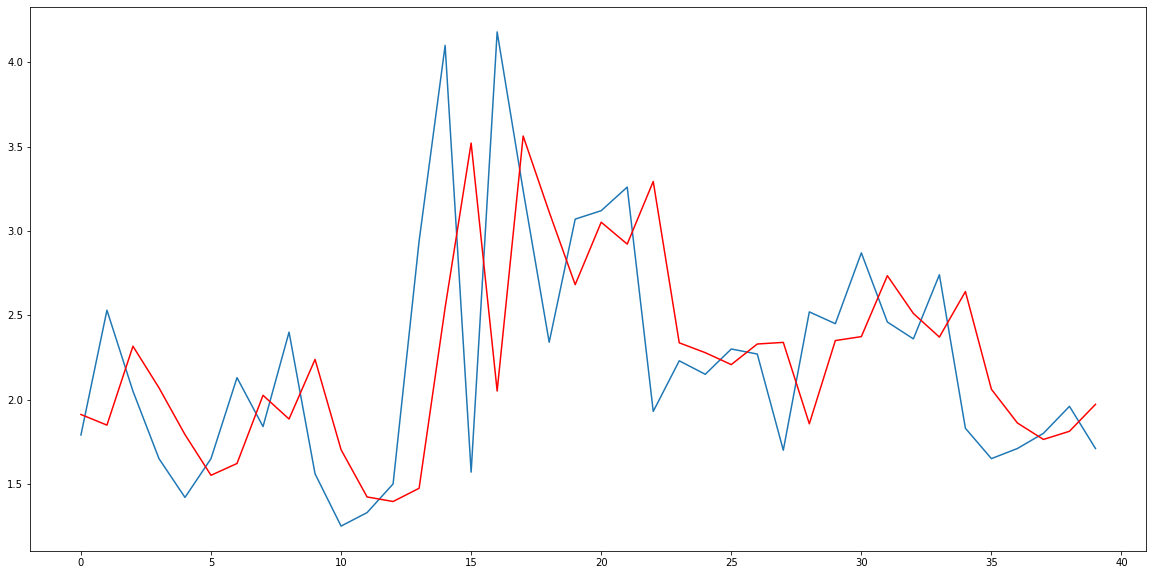

In [ ]:
# evaluate forecasts
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(test, predictions)
R2 = r2_score(test.tolist(), predictions)
MSE = mean_squared_error(test, predictions)

print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Time Series to Supervised Learning - Data Transformation

- Once the dataset is prepared, we must be careful in how it is used to fit and evaluate a model.
- For example, it would not be valid to fit the model on data from the future and have it predict the past. The model must be trained on the past and predict the future.
- This means that methods that randomize the dataset during evaluation, like k-fold cross-validation, cannot be used. Instead, we must use a technique called walk-forward validation.
- In walk-forward validation, the dataset is first split into train and test sets by selecting a cut point, e.g. all data except the last 12 days is used for training and the last 12 days is used for testing.
- If we are interested in making a one-step forecast, e.g. one month, then we can evaluate the model by training on the training dataset and predicting the first step in the test dataset. We can then add the real observation from the test set to the training dataset, refit the model, then have the model predict the second step in the test dataset.
- Repeating this process for the entire test dataset will give a one-step prediction for the entire test dataset from which an error measure can be calculated to evaluate the skill of the model.

In [3]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [1]:
# Using google collab 
# import packages and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['Data_grouped_by_date.csv']), parse_dates=['date'], infer_datetime_format=True)
date_df2 = df2['date']
df2.drop(columns='date',inplace = True)

Saving Data_grouped_by_date.csv to Data_grouped_by_date (3).csv


In [ ]:
# had to downgrade numpy and tensorflow to use LSTM model
!pip install numpy==1.19.5
!pip install tensorflow==2.5

# Predicting using LSTMS (Baseline Model - 1 layer -  1 time step)

train_X = (2631, 1, 22) 
train_y = (2631,) 
test_X = (1316, 1, 22) 
test_y = (1316,) 

Epoch 1/100
42/42 - 2s - loss: 0.8206 - val_loss: 0.7614
Epoch 2/100
42/42 - 0s - loss: 0.7210 - val_loss: 0.7194
Epoch 3/100
42/42 - 0s - loss: 0.6606 - val_loss: 0.6748
Epoch 4/100
42/42 - 0s - loss: 0.6025 - val_loss: 0.6289
Epoch 5/100
42/42 - 0s - loss: 0.5465 - val_loss: 0.5839
Epoch 6/100
42/42 - 0s - loss: 0.5027 - val_loss: 0.5537
Epoch 7/100
42/42 - 0s - loss: 0.4762 - val_loss: 0.5334
Epoch 8/100
42/42 - 0s - loss: 0.4717 - val_loss: 0.5160
Epoch 9/100
42/42 - 0s - loss: 0.4549 - val_loss: 0.5129
Epoch 10/100
42/42 - 0s - loss: 0.4566 - val_loss: 0.4995
Epoch 11/100
42/42 - 0s - loss: 0.4452 - val_loss: 0.4957
Epoch 12/100
42/42 - 0s - loss: 0.4435 - val_loss: 0.4997
Epoch 13/100
42/42 - 0s - loss: 0.4412 - val_loss: 0.4921
Epoch 14/100
42/42 - 0s - loss: 0.4433 - val_loss: 0.4899
Epoch 15/100
42/42 - 0s - loss: 0.4442 - val_loss: 0.4926
Epoch 16/100
42/42 - 0s - loss: 0.4419 - val_loss: 0

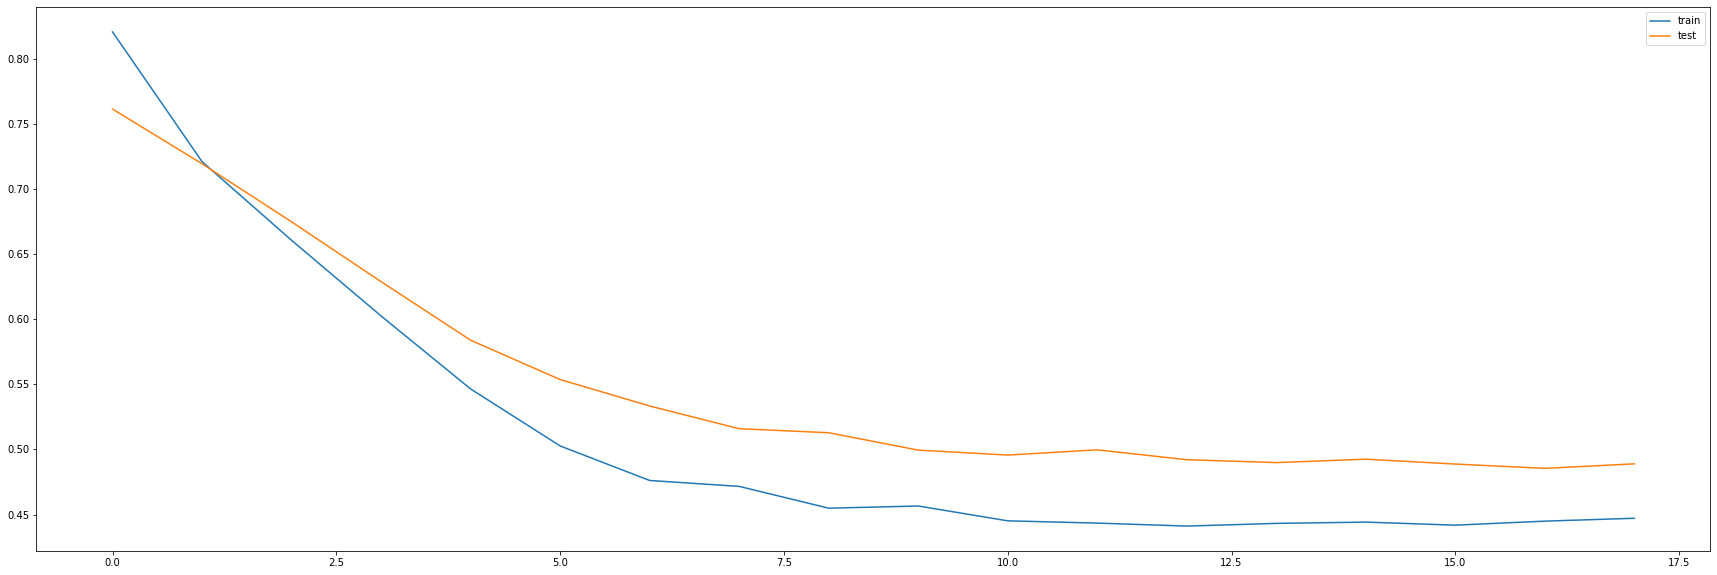

MAE Score: 0.489
MSE Score: 0.421
Test R2 Score: 0.564


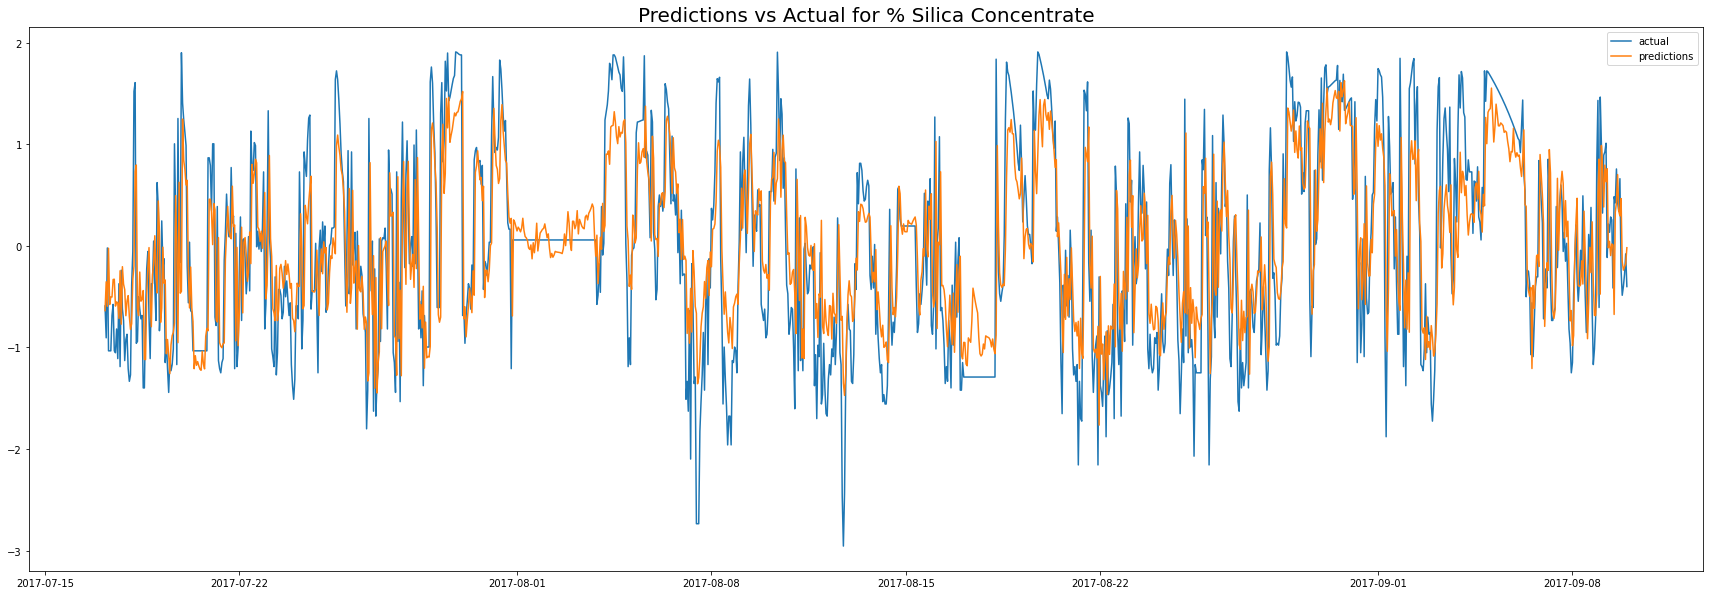


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                14600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 14,651
Trainable params: 14,651
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Normalize and Log data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initilize 
pt = PowerTransformer(standardize=True)
ss = StandardScaler()

#Power Transform -> Silica Feed, Silica Concentrate, Total Level
#Standard Scaler -> Everthing else
pt_data = df2[['% Silica Feed', '% Silica Concentrate']] #'total level']]
ss_data = df2.drop(columns=['% Silica Feed','% Silica Concentrate']) #'total level'])

#fit_transform data
df2_pt = pd.DataFrame(pt.fit_transform(pt_data), columns = pt_data.columns)
df2_ss = pd.DataFrame(ss.fit_transform(ss_data), columns = ss_data.columns)

#combine data - df3 become normalized df2 data
df3 = pd.concat([date_df2,df2_pt,df2_ss], axis=1)
df3 = df3.set_index(['date'])

#convert df3 to supervised using previous function
df4 = series_to_supervised(df3, n_in=1, n_out=1, dropnan=True)
df4.drop(df4.columns[25:], axis=1, inplace = True) #drop all t+1 columns except for var2 which is % silica concentrate
df4.drop(df4.columns[[22,23]], axis=1, inplace = True) #drop all iron concentrate t-1 columns because we dont want it in prediction as well as previous silica concentrate columsn

# split into train and test sets
values = df4.values
n_train_hours = int((values.shape[0])*(2/3))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print('train_X =',train_X.shape,'\ntrain_y =',train_y.shape,'\ntest_X =',test_X.shape,'\ntest_y =',test_y.shape,'\n')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
callback = EarlyStopping(monitor='loss', patience=5)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='MAE', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[callback])

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)

# evaluate forecasts
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(test_y, yhat)
R2 = r2_score(test_y, yhat)
MSE = mean_squared_error(test_y, yhat)

print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

# create new df for predictions and actual values
predict_times = df4.index[n_train_hours:].tolist()
actual = test_y.tolist()
predictions = []

for i in range(0,len(yhat)):
  predictions.append(float(yhat[i]))

df5 = pd.DataFrame({
    'Times': predict_times,
    'Actual': actual,
    'Predictions':predictions
})

# plot history
plt.plot(df5.Times, df5.Actual, label='actual')
plt.plot(df5.Times, df5.Predictions, label='predictions')
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Predictions vs Actual for % Silica Concentrate',fontsize=20)
plt.legend()
plt.show()
print('')

#plot model summary
model.summary()

# DL LSTM Model with Dropout Layers (3 layers + Dropout Layers + 1 time step) 

train_X = (2631, 1, 22) 
train_y = (2631,) 
test_X = (1316, 1, 22) 
test_y = (1316,) 

Epoch 1/100
42/42 - 8s - loss: 0.8617 - val_loss: 0.8119
Epoch 2/100
42/42 - 0s - loss: 0.8090 - val_loss: 0.7397
Epoch 3/100
42/42 - 0s - loss: 0.6708 - val_loss: 0.6069
Epoch 4/100
42/42 - 0s - loss: 0.5443 - val_loss: 0.4825
Epoch 5/100
42/42 - 0s - loss: 0.5305 - val_loss: 0.4830
Epoch 6/100
42/42 - 0s - loss: 0.4983 - val_loss: 0.4882
Epoch 7/100
42/42 - 0s - loss: 0.4859 - val_loss: 0.4721
Epoch 8/100
42/42 - 0s - loss: 0.4847 - val_loss: 0.4742
Epoch 9/100
42/42 - 0s - loss: 0.4760 - val_loss: 0.4718
Epoch 10/100
42/42 - 0s - loss: 0.4734 - val_loss: 0.4681
Epoch 11/100
42/42 - 0s - loss: 0.4748 - val_loss: 0.4628
Epoch 12/100
42/42 - 0s - loss: 0.4722 - val_loss: 0.4705
Epoch 13/100
42/42 - 0s - loss: 0.4771 - val_loss: 0.4779
Epoch 14/100
42/42 - 0s - loss: 0.4698 - val_loss: 0.4693
Epoch 15/100
42/42 - 0s - loss: 0.4654 - val_loss: 0.4639
Epoch 16/100
42/42 - 0s - loss: 0.4700 - val_loss: 0

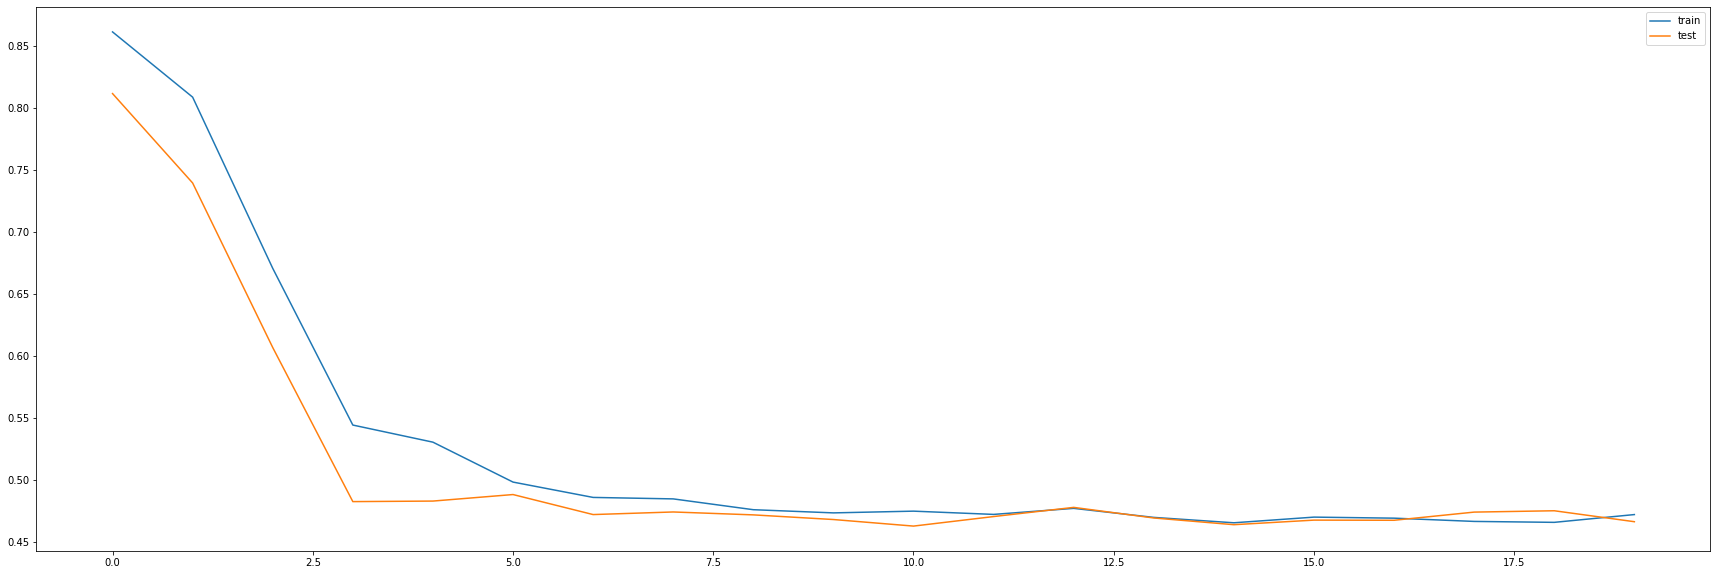

MAE Score: 0.466
MSE Score: 0.399
Test R2 Score: 0.587


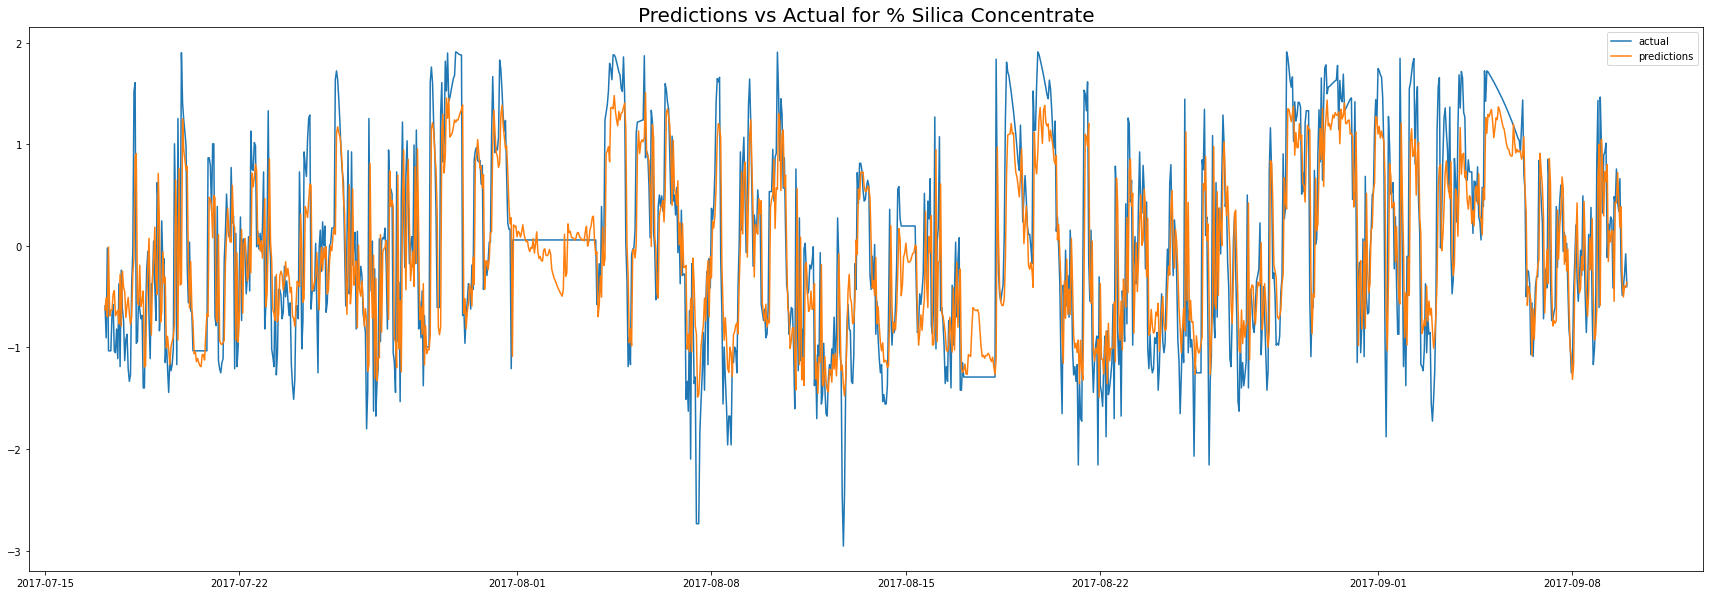


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 1, 50)             14600     
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 50)              

In [11]:
# Normalize and Log data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initilize 
pt = PowerTransformer(standardize=True)
ss = StandardScaler()

#Power Transform -> Silica Feed, Silica Concentrate, Total Level
#Standard Scaler -> Everthing else
pt_data = df2[['% Silica Feed', '% Silica Concentrate']] #'total level']]
ss_data = df2.drop(columns=['% Silica Feed','% Silica Concentrate']) #'total level'])

#fit_transform data
df2_pt = pd.DataFrame(pt.fit_transform(pt_data), columns = pt_data.columns)
df2_ss = pd.DataFrame(ss.fit_transform(ss_data), columns = ss_data.columns)

#combine data - df3 become normalized df2 data
df3 = pd.concat([date_df2,df2_pt,df2_ss], axis=1)
df3 = df3.set_index(['date'])

#convert df3 to supervised using previous function
df4 = series_to_supervised(df3, n_in=1, n_out=1, dropnan=True)
df4.drop(df4.columns[25:], axis=1, inplace = True) #drop all t+1 columns except for var2 which is % silica concentrate
df4.drop(df4.columns[[22,23]], axis=1, inplace = True) #drop all iron concentrate t-1 columns because we dont want it in prediction as well as previous silica concentrate columsn

# split into train and test sets
values = df4.values
n_train_hours = int((values.shape[0])*(2/3))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print('train_X =',train_X.shape,'\ntrain_y =',train_y.shape,'\ntest_X =',test_X.shape,'\ntest_y =',test_y.shape,'\n')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
callback = EarlyStopping(monitor='loss', patience=5)

# design network
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(loss='MAE', optimizer='adam')

#added drop out layers as the model was overfitting. When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[callback])

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)

# evaluate forecasts
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(test_y, yhat)
R2 = r2_score(test_y, yhat)
MSE = mean_squared_error(test_y, yhat)

print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

# create new df for predictions and actual values
predict_times = df4.index[n_train_hours:].tolist()
actual = test_y.tolist()
predictions = []

for i in range(0,len(yhat)):
  predictions.append(float(yhat[i]))

df5 = pd.DataFrame({
    'Times': predict_times,
    'Actual': actual,
    'Predictions':predictions
})

# plot history
plt.plot(df5.Times, df5.Actual, label='actual')
plt.plot(df5.Times, df5.Predictions, label='predictions')
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Predictions vs Actual for % Silica Concentrate',fontsize=20)
plt.legend()
plt.show()
print('')

#plot model summary
model.summary()

# Predicting using LSTMS (1 layer - 10 time steps)

train_X = (2625, 1, 220) 
train_y = (2625,) 
test_X = (1313, 1, 220) 
test_y = (1313,) 

Epoch 1/100
42/42 - 3s - loss: 0.7607 - val_loss: 0.7486
Epoch 2/100
42/42 - 0s - loss: 0.6390 - val_loss: 0.7037
Epoch 3/100
42/42 - 0s - loss: 0.6345 - val_loss: 0.6737
Epoch 4/100
42/42 - 0s - loss: 0.5557 - val_loss: 0.6742
Epoch 5/100
42/42 - 0s - loss: 0.5325 - val_loss: 0.6542
Epoch 6/100
42/42 - 0s - loss: 0.5535 - val_loss: 0.6405
Epoch 7/100
42/42 - 0s - loss: 0.5374 - val_loss: 0.6292
Epoch 8/100
42/42 - 0s - loss: 0.5589 - val_loss: 0.6458
Epoch 9/100
42/42 - 0s - loss: 0.5092 - val_loss: 0.6083
Epoch 10/100
42/42 - 0s - loss: 0.4853 - val_loss: 0.6420
Epoch 11/100
42/42 - 0s - loss: 0.4688 - val_loss: 0.6252
Epoch 12/100
42/42 - 0s - loss: 0.4597 - val_loss: 0.6196
Epoch 13/100
42/42 - 0s - loss: 0.4375 - val_loss: 0.6552
Epoch 14/100
42/42 - 0s - loss: 0.4960 - val_loss: 0.6166
Epoch 15/100
42/42 - 0s - loss: 0.5023 - val_loss: 0.6234
Epoch 16/100
42/42 - 0s - loss: 0.4907 - val_loss:

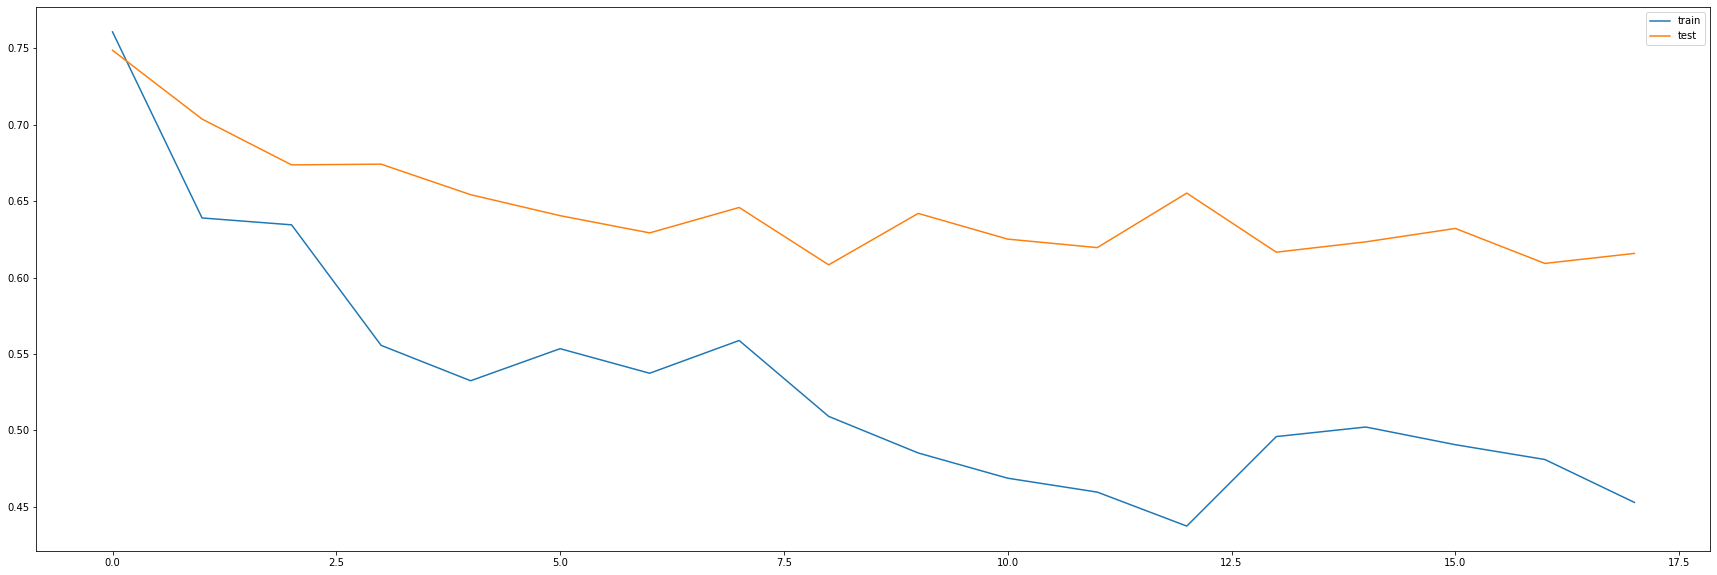

MAE Score: 0.616
MSE Score: 0.609
Test R2 Score: 0.369


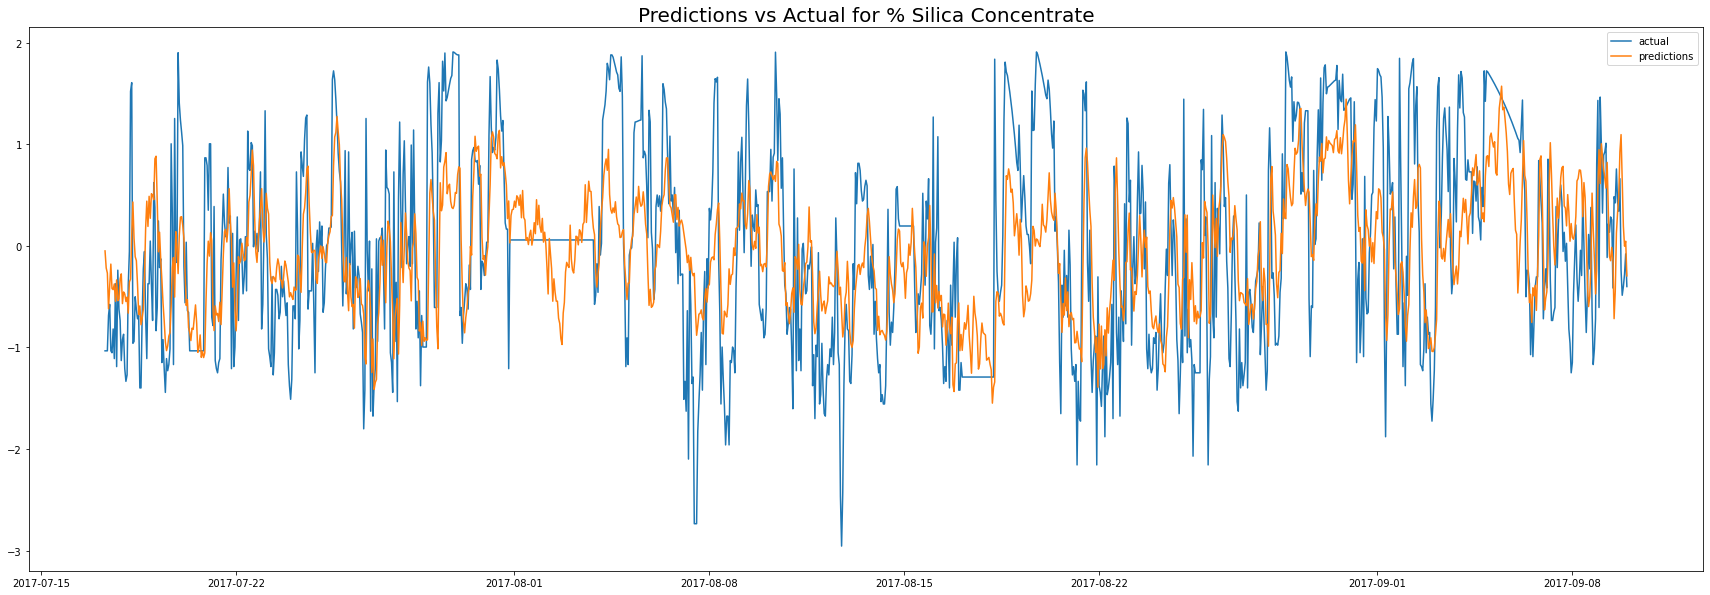


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                54200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 54,251
Trainable params: 54,251
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Normalize and Log data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initilize 
pt = PowerTransformer(standardize=True)
ss = StandardScaler()

#Power Transform -> Silica Feed, Silica Concentrate, Total Level
#Standard Scaler -> Everthing else
pt_data = df2[['% Silica Feed', '% Silica Concentrate']] #'total level']]
ss_data = df2.drop(columns=['% Silica Feed','% Silica Concentrate']) #'total level'])

#fit_transform data
df2_pt = pd.DataFrame(pt.fit_transform(pt_data), columns = pt_data.columns)
df2_ss = pd.DataFrame(ss.fit_transform(ss_data), columns = ss_data.columns)

#combine data - df3 become normalized df2 data
df3 = pd.concat([date_df2,df2_pt,df2_ss], axis=1)
df3.drop(columns=['% Iron Concentrate'],inplace=True)
df3 = df3.set_index(['date'])

#convert df3 to supervised using previous function
df4 = series_to_supervised(df3, n_in=10, n_out=1, dropnan=True)
df4.drop(df4.columns[222:], axis=1, inplace = True) #drop all t+1 columns except for var2 which is % silica concentrate
df4.drop(df4.columns[[220]], axis=1, inplace = True) #drop all iron concentrate t-1 columns because we dont want it in prediction as well as previous silica concentrate columsn

# split into train and test sets
values = df4.values
n_train_hours = int((values.shape[0])*(2/3))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print('train_X =',train_X.shape,'\ntrain_y =',train_y.shape,'\ntest_X =',test_X.shape,'\ntest_y =',test_y.shape,'\n')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
callback = EarlyStopping(monitor='loss', patience=5)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='MAE', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[callback])

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)

# evaluate forecasts
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(test_y, yhat)
R2 = r2_score(test_y, yhat)
MSE = mean_squared_error(test_y, yhat)

print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

# create new df for predictions and actual values
predict_times = df4.index[n_train_hours:].tolist()
actual = test_y.tolist()
predictions = []

for i in range(0,len(yhat)):
  predictions.append(float(yhat[i]))

df5 = pd.DataFrame({
    'Times': predict_times,
    'Actual': actual,
    'Predictions':predictions
})

# plot history
plt.plot(df5.Times, df5.Actual, label='actual')
plt.plot(df5.Times, df5.Predictions, label='predictions')
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Predictions vs Actual for % Silica Concentrate',fontsize=20)
plt.legend()
plt.show()
print('')

#plot model summary
model.summary()

#DL LSTM Model with Dropout Layers (3 layers + Dropout Layers + 10 time step)

train_X = (2625, 1, 220) 
train_y = (2625,) 
test_X = (1313, 1, 220) 
test_y = (1313,) 

Epoch 1/100
42/42 - 11s - loss: 0.8579 - val_loss: 0.8097
Epoch 2/100
42/42 - 1s - loss: 0.7765 - val_loss: 0.7668
Epoch 3/100
42/42 - 1s - loss: 0.6834 - val_loss: 0.7187
Epoch 4/100
42/42 - 0s - loss: 0.6173 - val_loss: 0.6872
Epoch 5/100
42/42 - 0s - loss: 0.5736 - val_loss: 0.6445
Epoch 6/100
42/42 - 1s - loss: 0.6242 - val_loss: 0.6694
Epoch 7/100
42/42 - 1s - loss: 0.5291 - val_loss: 0.6367
Epoch 8/100
42/42 - 1s - loss: 0.5359 - val_loss: 0.6209
Epoch 9/100
42/42 - 1s - loss: 0.5303 - val_loss: 0.6392
Epoch 10/100
42/42 - 0s - loss: 0.5094 - val_loss: 0.6031
Epoch 11/100
42/42 - 1s - loss: 0.5009 - val_loss: 0.6202
Epoch 12/100
42/42 - 1s - loss: 0.4932 - val_loss: 0.5960
Epoch 13/100
42/42 - 1s - loss: 0.4764 - val_loss: 0.5988
Epoch 14/100
42/42 - 0s - loss: 0.5183 - val_loss: 0.6132
Epoch 15/100
42/42 - 0s - loss: 0.4990 - val_loss: 0.5890
Epoch 16/100
42/42 - 1s - loss: 0.4765 - val_loss

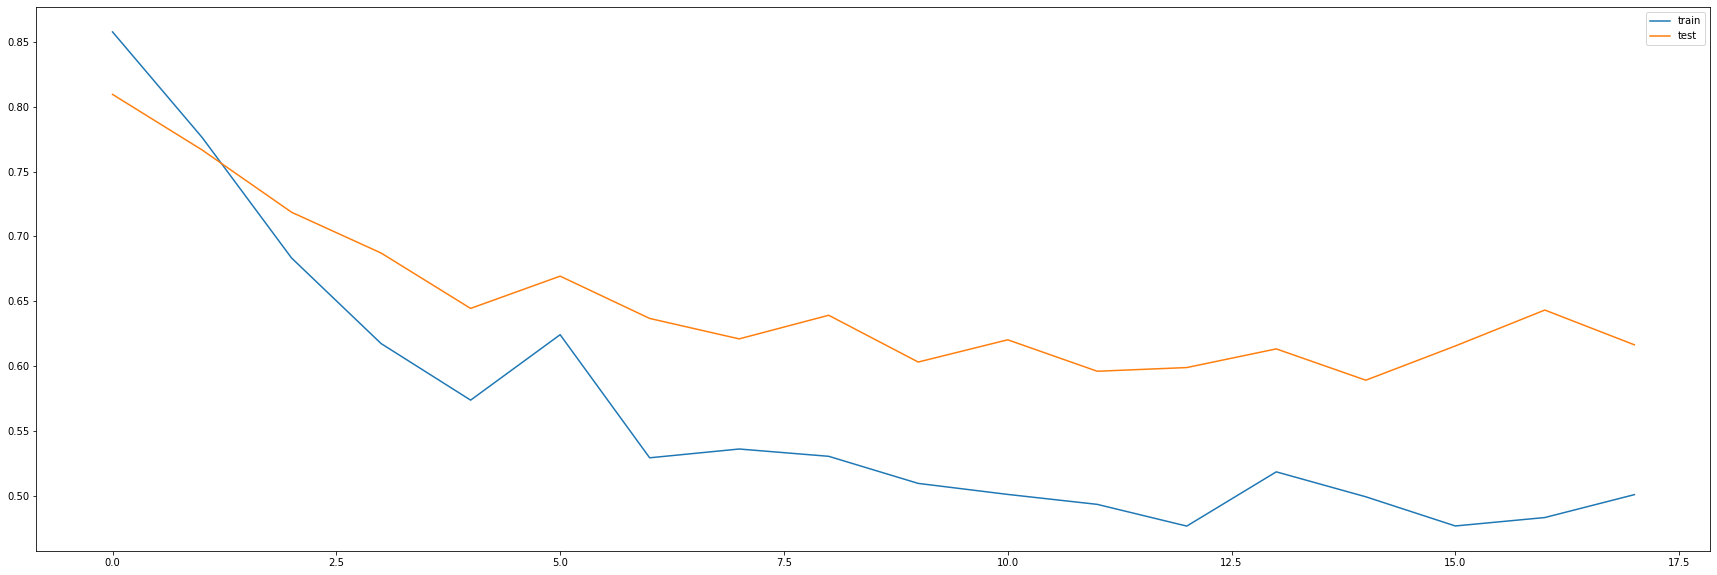

MAE Score: 0.616
MSE Score: 0.586
Test R2 Score: 0.394


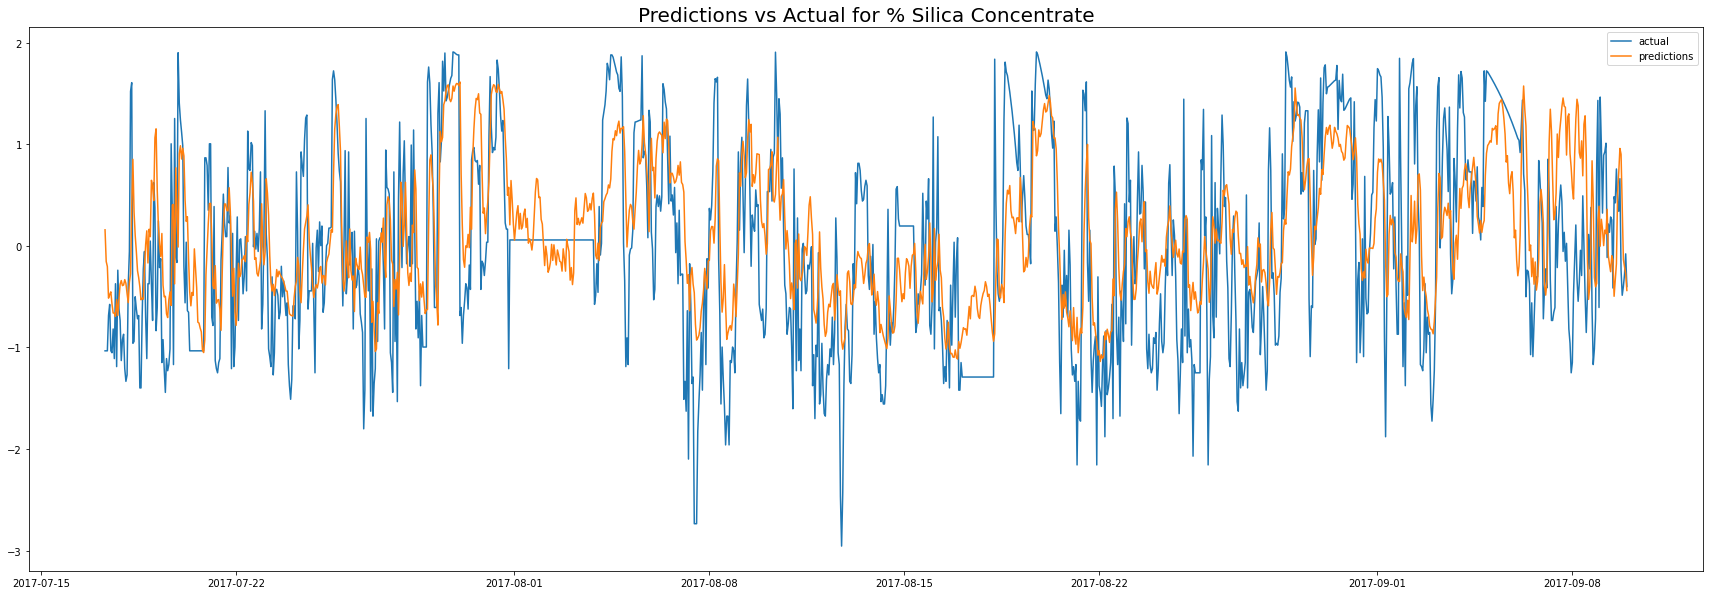


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 1, 50)             54200     
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 50)             

In [88]:
# Normalize and Log data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initilize 
pt = PowerTransformer(standardize=True)
ss = StandardScaler()

#Power Transform -> Silica Feed, Silica Concentrate, Total Level
#Standard Scaler -> Everthing else
pt_data = df2[['% Silica Feed', '% Silica Concentrate']] #'total level']]
ss_data = df2.drop(columns=['% Silica Feed','% Silica Concentrate']) #'total level'])

#fit_transform data
df2_pt = pd.DataFrame(pt.fit_transform(pt_data), columns = pt_data.columns)
df2_ss = pd.DataFrame(ss.fit_transform(ss_data), columns = ss_data.columns)

#combine data - df3 become normalized df2 data
df3 = pd.concat([date_df2,df2_pt,df2_ss], axis=1)
df3.drop(columns=['% Iron Concentrate'],inplace=True)
df3 = df3.set_index(['date'])

#convert df3 to supervised using previous function
df4 = series_to_supervised(df3, n_in=10, n_out=1, dropnan=True)
df4.drop(df4.columns[222:], axis=1, inplace = True) #drop all t+1 columns except for var2 which is % silica concentrate
df4.drop(df4.columns[[220]], axis=1, inplace = True) #drop all iron concentrate t-1 columns because we dont want it in prediction as well as previous silica concentrate columsn

# split into train and test sets
values = df4.values
n_train_hours = int((values.shape[0])*(2/3))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print('train_X =',train_X.shape,'\ntrain_y =',train_y.shape,'\ntest_X =',test_X.shape,'\ntest_y =',test_y.shape,'\n')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
callback = EarlyStopping(monitor='loss', patience=5)

# design network
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(loss='MAE', optimizer='adam')

#added drop out layers as the model was overfitting. When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[callback])

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)

# evaluate forecasts
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(test_y, yhat)
R2 = r2_score(test_y, yhat)
MSE = mean_squared_error(test_y, yhat)

print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

# create new df for predictions and actual values
predict_times = df4.index[n_train_hours:].tolist()
actual = test_y.tolist()
predictions = []

for i in range(0,len(yhat)):
  predictions.append(float(yhat[i]))

df5 = pd.DataFrame({
    'Times': predict_times,
    'Actual': actual,
    'Predictions':predictions
})

# plot history
plt.plot(df5.Times, df5.Actual, label='actual')
plt.plot(df5.Times, df5.Predictions, label='predictions')
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Predictions vs Actual for % Silica Concentrate',fontsize=20)
plt.legend()
plt.show()
print('')

#plot model summary
model.summary()

# 1D CNN Model (2 time steps)

Epoch 1/100
42/42 - 1s - loss: 0.8160 - val_loss: 0.6884
Epoch 2/100
42/42 - 0s - loss: 0.6482 - val_loss: 0.7166
Epoch 3/100
42/42 - 0s - loss: 0.5660 - val_loss: 0.7298
Epoch 4/100
42/42 - 0s - loss: 0.5144 - val_loss: 0.6662
Epoch 5/100
42/42 - 0s - loss: 0.4999 - val_loss: 0.6826
Epoch 6/100
42/42 - 0s - loss: 0.4760 - val_loss: 0.6450
Epoch 7/100
42/42 - 0s - loss: 0.4633 - val_loss: 0.6568
Epoch 8/100
42/42 - 0s - loss: 0.4551 - val_loss: 0.6582
Epoch 9/100
42/42 - 0s - loss: 0.4556 - val_loss: 0.6858
Epoch 10/100
42/42 - 0s - loss: 0.4538 - val_loss: 0.6479
Epoch 11/100
42/42 - 0s - loss: 0.4439 - val_loss: 0.6051
Epoch 12/100
42/42 - 0s - loss: 0.4356 - val_loss: 0.6025
Epoch 13/100
42/42 - 0s - loss: 0.4383 - val_loss: 0.6280
Epoch 14/100
42/42 - 0s - loss: 0.4310 - val_loss: 0.6187
Epoch 15/100
42/42 - 0s - loss: 0.4712 - val_loss: 0.6250
Epoch 16/100
42/42 - 0s - loss: 0.4451 - val_loss: 0.6407
Epoch 17/100
42/42 - 0s - loss: 0.4404 - val_loss: 0.6022
Epoch 18/100
42/42 - 0s

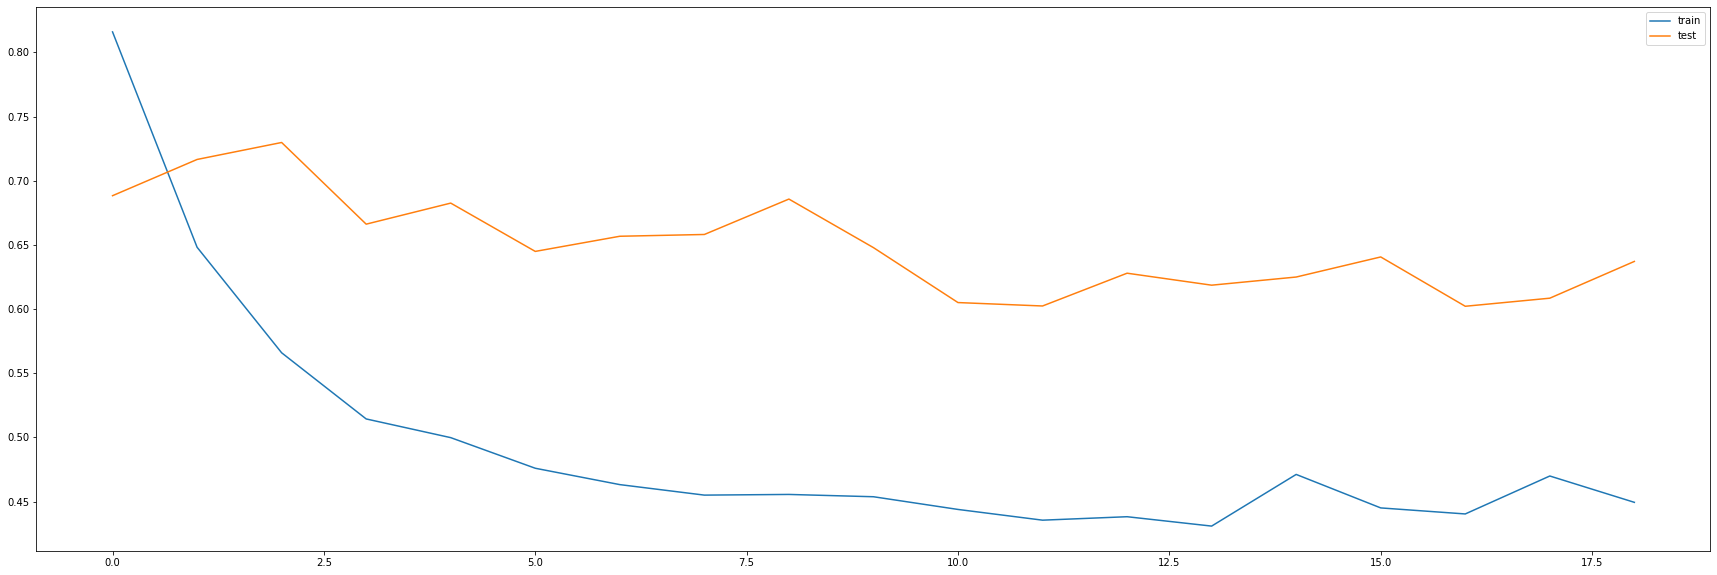

MAE Score: 0.637
MSE Score: 0.661
Test R2 Score: 0.315


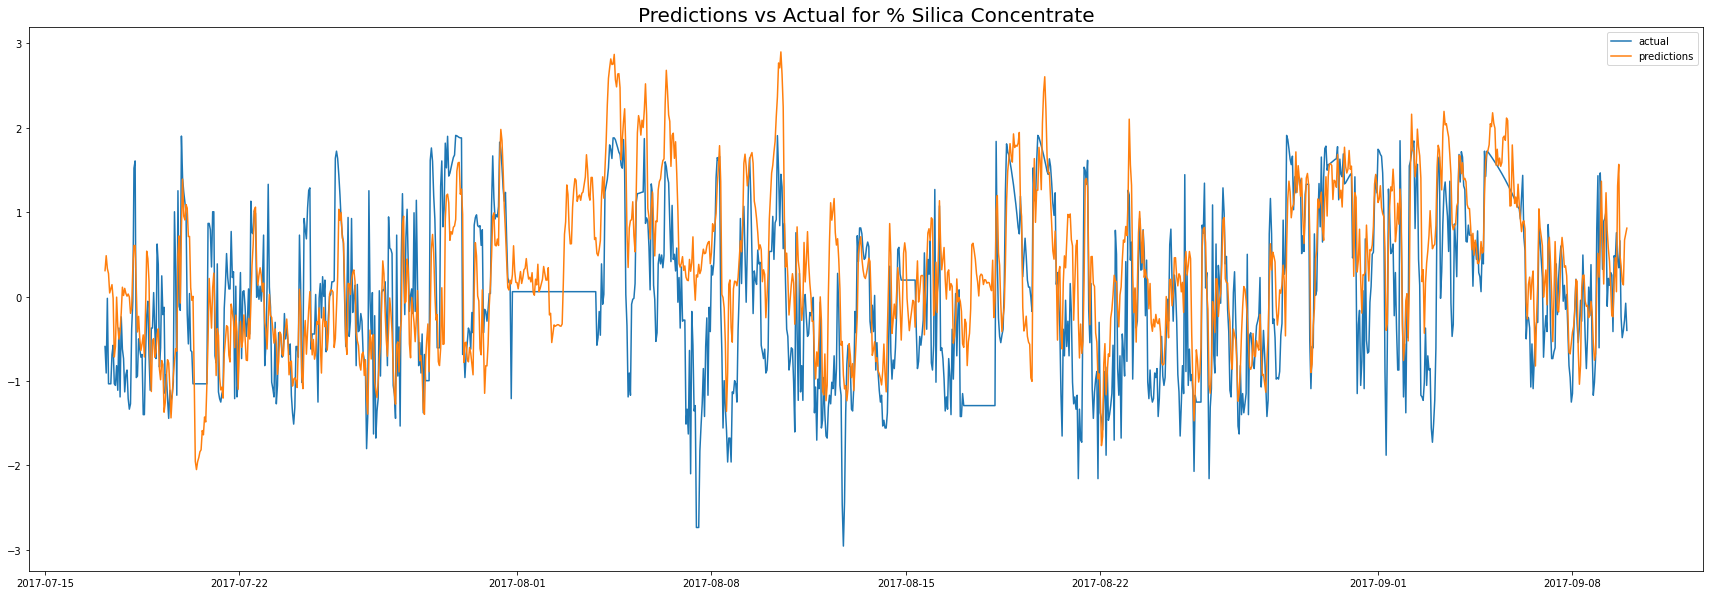


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 2, 64)             1472      
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 1, 64)             0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 50)                3250      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 51        
Total params: 4,773
Trainable params: 4,773
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Normalize and Log data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initilize 
pt = PowerTransformer(standardize=True)
ss = StandardScaler()

#Power Transform -> Silica Feed, Silica Concentrate, Total Level
#Standard Scaler -> Everthing else
pt_data = df2[['% Silica Feed', '% Silica Concentrate']] #'total level']]
ss_data = df2.drop(columns=['% Silica Feed','% Silica Concentrate']) #'total level'])

#fit_transform data
df2_pt = pd.DataFrame(pt.fit_transform(pt_data), columns = pt_data.columns)
df2_ss = pd.DataFrame(ss.fit_transform(ss_data), columns = ss_data.columns)

#combine data - df3 become normalized df2 data
df3 = pd.concat([date_df2,df2_ss,df2_pt], axis=1)
df3 = df3.set_index(['date'])
df3.drop(columns=['% Iron Concentrate'],inplace=True)

# multivariate cnn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
 # choose a number of time steps
n_steps = 2

# convert into input/output
X, y = split_sequences(df3.values, n_steps)

# split into train and test sets
n_train_hours = int((X.shape[0])*(2/3))
train_X = X[:n_train_hours]
train_y = y[:n_train_hours]
test_X = X[n_train_hours:]
test_y = y[n_train_hours:]

# the dataset knows the number of features
n_features = X.shape[2]

# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
callback = EarlyStopping(monitor='loss', patience=5)

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='MAE')

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(test_X, test_y), verbose=2, shuffle=False)# callbacks=[callback])

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)

# evaluate forecasts
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(test_y, yhat)
R2 = r2_score(test_y, yhat)
MSE = mean_squared_error(test_y, yhat)

print("MAE Score:", round(MAE,3))
print("MSE Score:", round(MSE,3))
print("Test R2 Score:", round(R2,3))

# create new df for predictions and actual values
predict_times = df3.index[n_train_hours+1:].tolist()
actual = test_y.tolist()
predictions = []

for i in range(0,len(yhat)):
  predictions.append(float(yhat[i]))

df5 = pd.DataFrame({
    'Times': predict_times,
    'Actual': actual,
    'Predictions':predictions
})

# plot history
plt.plot(df5.Times, df5.Actual, label='actual')
plt.plot(df5.Times, df5.Predictions, label='predictions')
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Predictions vs Actual for % Silica Concentrate',fontsize=20)
plt.legend()
plt.show()
print('')

#plot model summary
model.summary()